# Delivery_time -> Predict delivery time using sorting time

In [59]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
import statsmodels.api as sm

In [28]:
data=pd.read_csv("C:\\Users\\Anks\\Desktop\\DATA ANALYST ASSINMENT\\delivery_time (2).csv")


data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [32]:
data.columns=["D1","S1"]
data.head()

,D1,S1
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA and Data Visualization

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   D1      21 non-null     float64
 1   S1      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='D1', ylabel='Density'>

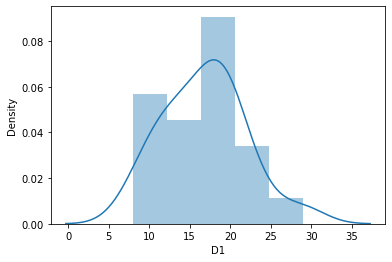

In [34]:
sns.distplot(data['D1'])

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='S1', ylabel='Density'>

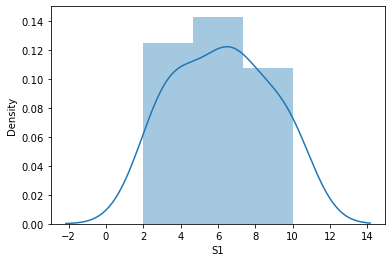

In [35]:
sns.distplot(data['S1'])

# Correlation


In [36]:
data.corr()

,D1,S1
D1,1.000000,0.825997
S1,0.825997,1.000000


<AxesSubplot:xlabel='S1', ylabel='D1'>

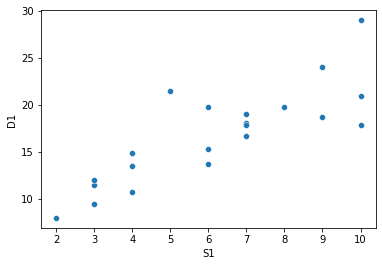

In [84]:
sns.scatterplot(x=data["S1"], y=data["D1"])

In [37]:
x=np.array(data["S1"])
print("Dimension : ",x.ndim)
print("Shape : ",x.shape)

Dimension :  1
Shape :  (21,)


In [38]:
x=x.reshape(-1,1)
print("Dimension : ",x.ndim)
print("Shape : ",x.shape)

Dimension :  2
Shape :  (21, 1)


In [39]:
y=np.array(data["D1"]).reshape(-1,1)
print("Dimension : ",y.ndim)
print("Shape : ",y.shape)

Dimension :  2
Shape :  (21, 1)


In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [41]:
print("Length of X_train : ", len(x_train))
print("Length of Y_train : ", len(y_train))
print("Length of X_test : ", len(x_test))
print("Length of Y_test : ", len(y_test))

Length of X_train :  16
Length of Y_train :  16
Length of X_test :  5
Length of Y_test :  5


In [42]:
x_test

array([[3],
       [7],
       [7],
       [7],
       [7]], dtype=int64)

In [43]:
y_test

array([[11.5 ],
       [19.  ],
       [17.83],
       [18.11],
       [16.68]])

In [44]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [45]:
model.score(x_test,y_test)

0.913656199316424

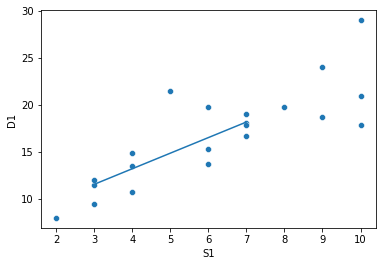

In [46]:
sns.scatterplot(x=data2["S1"],y=data2["D1"])
plt.plot(x_test,model.predict(x_test))
plt.show()

In [47]:
model.coef_

array([[1.6543693]])

In [48]:
model.intercept_

array([6.60671498])

In [49]:
y_predicted = model.predict(x_test)
y_predicted = np.round(y_predicted,2)
y_predicted

array([[11.57],
       [18.19],
       [18.19],
       [18.19],
       [18.19]])

In [50]:
x_test[0:,0]

array([3, 7, 7, 7, 7], dtype=int64)

In [51]:
y_test[0:,0]

array([11.5 , 19.  , 17.83, 18.11, 16.68])

In [52]:
data_1 = {"Test_Sorting_Time" : x_test[0:,0], "Actual_Delivery_Time" : y_test[0:,0], "Predicted_Delivery_Time" : y_predicted[0:,0]}
data_1 = pd.DataFrame(data_1)
data_1.to_csv("C:\\Users\\Anks\\Downloads\\delivery_time (1).csv")
data_1.head()

,Test_Sorting_Time,Actual_Delivery_Time,Predicted_Delivery_Time
0,3,11.50,11.57
1,7,19.00,18.19
2,7,17.83,18.19
3,7,18.11,18.19
4,7,16.68,18.19


In [53]:
import statsmodels.formula.api as smf


In [54]:
linear_model = smf.ols("y~x", data=data2).fit()


In [55]:
linear_model.params

Intercept    6.582734
x            1.649020
dtype: float64

In [56]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        18:13:32   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
x              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 1 - No transformation



In [85]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)


In [87]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                    6.12e-15
Time:                        19:28:15   Log-Likelihood:                         -57.349
No. Observations:                  21   AIC:                                      116.7
Df Residuals:                      20   BIC:                                      117.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.5652      0.125     20.603      0.000       2.306       2.825
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.508
Skew:                          -0.348   Prob(JB):                        0.776
Kurtosis:                       3.310   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
import statsmodels.api as sm

# 2 - Log Transformation of X



In [65]:
x_log = np.log(data['S1'])

In [66]:
model = sm.OLS(y, x_log).fit()
predictions = model.predict(x_log)


    

In [67]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              791.0
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                    1.48e-17
Time:                        18:16:48   Log-Likelihood:                         -51.035
No. Observations:                  21   AIC:                                      104.1
Df Residuals:                      20   BIC:                                      105.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
S1             9.6706      0.344     28.124      0.000       8.953      10.388
==============================================================================
Omnibus:                        3.656   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.164
Skew:                           0.772   Prob(JB):                        0.339
Kurtosis:                       3.298   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3 - Log Transformation of Y

In [69]:
y_log = np.log(data['D1'])


In [70]:
model = sm.OLS(y_log, x).fit()
predictions = model.predict(x)


In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     D1   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              219.7
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                    3.00e-12
Time:                        18:18:01   Log-Likelihood:                         -25.284
No. Observations:                  21   AIC:                                      52.57
Df Residuals:                      20   BIC:                                      53.61
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4008      0.027     14.821      0.000       0.344       0.457
==============================================================================
Omnibus:                        2.572   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.346
Skew:                          -0.275   Prob(JB):                        0.510
Kurtosis:                       1.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4 - Log Transformation of X & Y



In [72]:
model = sm.OLS(y_log, x_log).fit()
predictions = model.predict(x_log)


In [73]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     D1   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              688.7
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                    5.72e-17
Time:                        18:18:39   Log-Likelihood:                         -13.899
No. Observations:                  21   AIC:                                      29.80
Df Residuals:                      20   BIC:                                      30.84
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
S1             1.5396      0.059     26.244      0.000       1.417       1.662
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.137
Skew:                           0.304   Prob(JB):                        0.566
Kurtosis:                       2.035   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 5 - Sq Root Transformation of X



In [75]:
x_sqrt = np.sqrt(data['S1'])

In [76]:
model = sm.OLS(y, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [77]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              772.0
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                    1.88e-17
Time:                        18:19:40   Log-Likelihood:                         -51.284
No. Observations:                  21   AIC:                                      104.6
Df Residuals:                      20   BIC:                                      105.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
S1             6.9466      0.250     27.785      0.000       6.425       7.468
==============================================================================
Omnibus:                        6.818   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                4.599
Skew:                           1.090   Prob(JB):                        0.100
Kurtosis:                       3.708   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 6 - Square Root Transformation of Y



In [79]:
y_sqrt = np.sqrt(data['D1'])

In [80]:

model = sm.OLS(y_sqrt, x).fit()
predictions = model.predict(x)

In [81]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     D1   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              266.0
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                    5.09e-13
Time:                        18:20:59   Log-Likelihood:                         -31.484
No. Observations:                  21   AIC:                                      64.97
Df Residuals:                      20   BIC:                                      66.01
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5926      0.036     16.309      0.000       0.517       0.668
==============================================================================
Omnibus:                        1.452   Durbin-Watson:                   1.434
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                1.105
Skew:                          -0.328   Prob(JB):                        0.575
Kurtosis:                       2.087   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7 - Square Root Transformation of X & Y




In [82]:
model = sm.OLS(y_sqrt, x_sqrt).fit()
predictions = model.predict(x_sqrt)


     




In [83]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     D1   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1542.
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                    2.10e-20
Time:                        18:21:37   Log-Likelihood:                         -13.658
No. Observations:                  21   AIC:                                      29.32
Df Residuals:                      20   BIC:                                      30.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
S1             1.6364      0.042     39.267      0.000       1.549       1.723
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.231
Skew:                          -0.179   Prob(JB):                        0.891
Kurtosis:                       2.632   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# - Output Interpretation
We will use Model 7 as it has the best R square value

1 - p-value < 0.01
Thus the model is accepted

2 - coefficient == 1.64
Thus if the value of Sorting Time is increased by 1, the predicted value of Delivery Time will increase by 1.64

3 - Adj. R-sqared == 0.987
Thus the model explains 98.7% of the variance in dependent variable